In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from pandas_datareader import DataReader
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import quandl
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Import TimeSeries class
from alpha_vantage.timeseries import TimeSeries


# Initialize the TimeSeries class with key and output format
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

# Get pandas dataframe with the intraday data and information of the data
intraday_data, data_info = ts.get_intraday('BABA', outputsize='full', interval='60min')

# Print the information of the data
data_info

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'BABA',
 '3. Last Refreshed': '2019-12-10 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [3]:
intraday_data = pd.DataFrame(intraday_data)


In [4]:
intraday_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data.rename_axis('Timestamp')
baba_df = intraday_data['Open']
baba_df = pd.DataFrame(baba_df)
baba_df = baba_df.rename_axis('Timestamp')

In [5]:
#TSLA stock price
intraday_data_1, data_info = ts.get_intraday('TSLA', outputsize='full', interval='60min')
# Print the information of the data
data_info

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2019-12-10 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [6]:
intraday_data_1 = pd.DataFrame(intraday_data_1)
intraday_data_1.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_1.rename_axis('Timestamp')
tsla_df = intraday_data_1['Open']
tsla_df = pd.DataFrame(tsla_df)
tsla_df = tsla_df.rename_axis('Timestamp')

In [7]:
#AMD stock price
intraday_data_2, data_info = ts.get_intraday('AMD', outputsize='full', interval='60min')
# Print the information of the data
data_info

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'AMD',
 '3. Last Refreshed': '2019-12-10 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [8]:
intraday_data_2 = pd.DataFrame(intraday_data_2)
intraday_data_2.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_2.rename_axis('Timestamp')
amd_df = intraday_data_2['Open']
amd_df = pd.DataFrame(amd_df)
amd_df = amd_df.rename_axis('Timestamp')
amd_df

,Open
Timestamp,
2019-12-10 15:30:00,39.4306
2019-12-10 14:30:00,39.4714
2019-12-10 13:30:00,39.5750
2019-12-10 12:30:00,39.6450
2019-12-10 11:30:00,39.6660
...,...
2019-09-17 13:30:00,30.8350
2019-09-17 12:30:00,30.8805
2019-09-17 11:30:00,30.8000


In [9]:
#SQ stock priceß
intraday_data_3, data_info = ts.get_intraday('SQ', outputsize='full', interval='60min')
# Print the information of the data
data_info

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'SQ',
 '3. Last Refreshed': '2019-12-10 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [10]:
intraday_data_3 = pd.DataFrame(intraday_data_3)
intraday_data_3.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_3.rename_axis('Timestamp')
sq_df = intraday_data_3['Open']
sq_df = pd.DataFrame(sq_df)
sq_df = sq_df.rename_axis('Timestamp')
sq_df

,Open
Timestamp,
2019-12-10 15:30:00,65.7011
2019-12-10 14:30:00,65.7700
2019-12-10 13:30:00,65.6024
2019-12-10 12:30:00,65.6713
2019-12-10 11:30:00,65.8179
...,...
2019-09-17 13:30:00,59.4119
2019-09-17 12:30:00,59.6300
2019-09-17 11:30:00,59.5450


In [11]:
stocks_df = pd.concat([baba_df, tsla_df, amd_df, sq_df], axis=1)
stocks_df.columns = ['BABA', 'TSLA', 'AMD', 'SQ']
stocks_df

,BABA,TSLA,AMD,SQ
Timestamp,,,,
2019-12-10 15:30:00,200.4933,347.7457,39.4306,65.7011
2019-12-10 14:30:00,201.4500,349.3226,39.4714,65.7700
2019-12-10 13:30:00,201.2878,349.9281,39.5750,65.6024
2019-12-10 12:30:00,201.3300,349.1968,39.6450,65.6713
2019-12-10 11:30:00,201.5450,347.8988,39.6660,65.8179
...,...,...,...,...
2019-09-17 13:30:00,178.5400,244.6479,30.8350,59.4119
2019-09-17 12:30:00,178.3579,244.6320,30.8805,59.6300
2019-09-17 11:30:00,178.6164,242.6500,30.8000,59.5450


In [12]:
stocks_df.isnull().sum()
stocks_df.dropna(inplace=True)
stocks_df.isnull().sum()

BABA    0
TSLA    0
AMD     0
SQ      0
dtype: int64

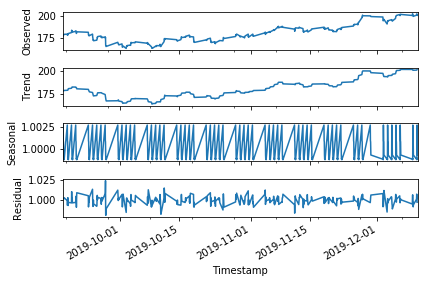

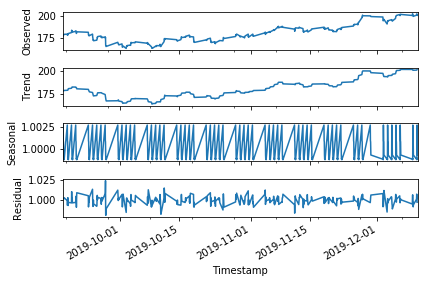

In [13]:
#Decomposition to find out seasonal/trend/residual of each stock
decomposed_baba = seasonal_decompose(stocks_df['BABA'], model='multiplicative', freq=7)
decomposed_baba.plot()

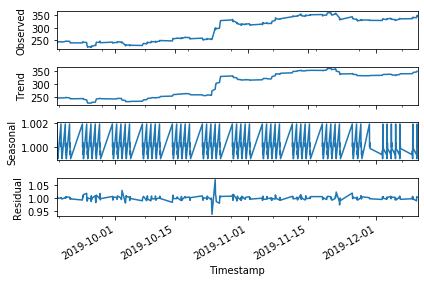

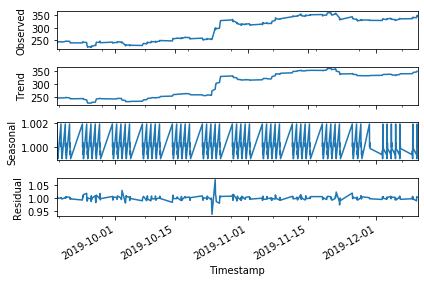

In [14]:
decomposed_tsla = seasonal_decompose(stocks_df['TSLA'], model='multiplicative', freq=7)
decomposed_tsla.plot()

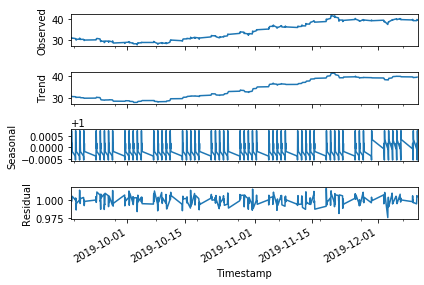

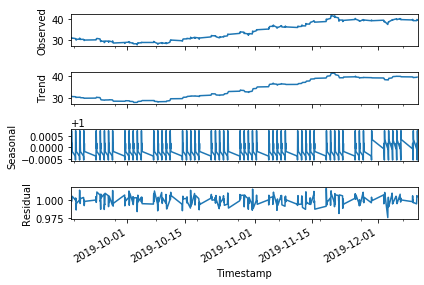

In [15]:
decomposed_amd = seasonal_decompose(stocks_df['AMD'], model='multiplicative', freq=7)
decomposed_amd.plot()

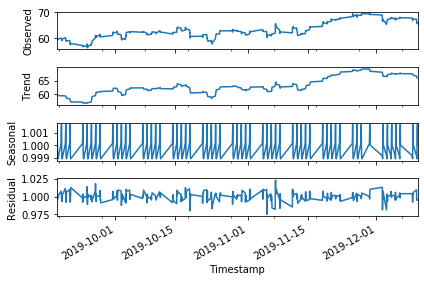

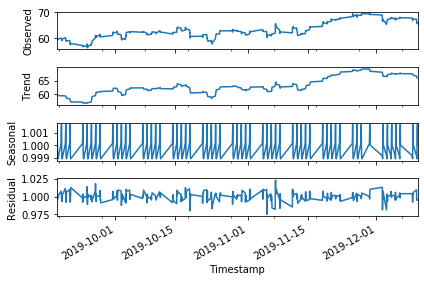

In [16]:
decomposed_sq = seasonal_decompose(stocks_df['SQ'], model='multiplicative', freq=7)
decomposed_sq.plot()

# Extra Feature

In [17]:
#Getting ETFs
# QQQ
intraday_data_qqq, data_info = ts.get_intraday('QQQ', outputsize='full', interval='60min')
intraday_data_qqq.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_qqq.rename_axis('Timestamp')
qqq_df = intraday_data_qqq['Open']
qqq_df = pd.DataFrame(qqq_df)
qqq_df = qqq_df.rename_axis('Timestamp')

# SPY
intraday_data_spy, data_info = ts.get_intraday('SPY', outputsize='full', interval='60min')
intraday_data_spy.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_spy.rename_axis('Timestamp')
spy_df = intraday_data_spy['Open']
spy_df = pd.DataFrame(spy_df)
spy_df = spy_df.rename_axis('Timestamp')

# XSD (SPDR S&P semi-conductor ETF)
intraday_data_xsd, data_info = ts.get_intraday('XSD', outputsize='full', interval='60min')
intraday_data_xsd.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_xsd.rename_axis('Timestamp')
xsd_df = intraday_data_xsd['Open']
xsd_df = pd.DataFrame(xsd_df)
xsd_df = xsd_df.rename_axis('Timestamp')

# VTI (Vanguard Total Stock Market)
intraday_data_vti, data_info = ts.get_intraday('VTI', outputsize='full', interval='60min')
intraday_data_vti.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_vti.rename_axis('Timestamp')
vti_df = intraday_data_vti['Open']
vti_df = pd.DataFrame(vti_df)
vti_df = vti_df.rename_axis('Timestamp')

# GXC (SPDR S&P China ETF)
intraday_data_gxc, data_info = ts.get_intraday('GXC', outputsize='full', interval='60min')
intraday_data_gxc.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_gxc.rename_axis('Timestamp')
gxc_df = intraday_data_gxc['Open']
gxc_df = pd.DataFrame(gxc_df)
gxc_df = gxc_df.rename_axis('Timestamp')

# MCHI (iShares MSCI China ETF)
intraday_data_mchi, data_info = ts.get_intraday('MCHI', outputsize='full', interval='60min')
intraday_data_mchi.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_mchi.rename_axis('Timestamp')
mchi_df = intraday_data_mchi['Open']
mchi_df = pd.DataFrame(mchi_df)
mchi_df = mchi_df.rename_axis('Timestamp')

# IPAY (Prime Mobile Payment ETF)
intraday_data_ipay, data_info = ts.get_intraday('IPAY', outputsize='full', interval='60min')
intraday_data_ipay.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_ipay.rename_axis('Timestamp')
ipay_df = intraday_data_ipay['Open']
ipay_df = pd.DataFrame(ipay_df)
ipay_df = ipay_df.rename_axis('Timestamp')

# CL (Crude Oil Future)
intraday_data_cl, data_info = ts.get_intraday('CL', outputsize='full', interval='60min')
intraday_data_cl.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_cl.rename_axis('Timestamp')
cl_df = intraday_data_cl['Open']
cl_df = pd.DataFrame(cl_df)
cl_df = cl_df.rename_axis('Timestamp')

# GLD (SPDR Gold Trust)
intraday_data_gld, data_info = ts.get_intraday('GLD', outputsize='full', interval='60min')
intraday_data_gld.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_gld.rename_axis('Timestamp')
gld_df = intraday_data_gld['Open']
gld_df = pd.DataFrame(gld_df)
gld_df = gld_df.rename_axis('Timestamp')

# AMT (American Tower Corp / Real Estate)
intraday_data_amt, data_info = ts.get_intraday('AMT', outputsize='full', interval='60min')
intraday_data_amt.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_amt.rename_axis('Timestamp')
amt_df = intraday_data_amt['Open']
amt_df = pd.DataFrame(amt_df)
amt_df = amt_df.rename_axis('Timestamp')

# SPG (Simon Property Group / Real Estate)
intraday_data_spg, data_info = ts.get_intraday('SPG', outputsize='full', interval='60min')
intraday_data_spg.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
intraday_data_spg.rename_axis('Timestamp')
spg_df = intraday_data_spg['Open']
spg_df = pd.DataFrame(spg_df)
spg_df = spg_df.rename_axis('Timestamp')

In [18]:
# Concat everything together
stocks_df_2 = pd.concat(
    [stocks_df, qqq_df, spy_df, xsd_df, vti_df, gxc_df, mchi_df, ipay_df, cl_df, gld_df, amt_df, spg_df], 
    axis=1
)

stocks_df_2.columns = [
    'BABA', 'TSLA', 'AMD', 'SQ', 'QQQ', 'SPY', 'XSD', 'VTI', 'GXC', 'MCHI', 'IPAY', 'CL', 'GLD', 'AMT', 'SPG'
]

stocks_df_2

,BABA,TSLA,AMD,SQ,QQQ,SPY,XSD,VTI,GXC,MCHI,IPAY,CL,GLD,AMT,SPG
Timestamp,,,,,,,,,,,,,,,
2019-09-17 09:30:00,176.8547,242.4264,31.0858,60.2016,191.6150,299.9400,93.7225,152.3540,93.8200,58.6115,47.4100,69.5700,141.8237,218.4057,154.5941
2019-09-17 10:30:00,177.1200,240.8000,30.8462,59.6800,191.6100,300.1650,93.5800,152.3600,94.4044,58.7200,47.8137,70.4426,141.6803,221.4083,153.2357
2019-09-17 11:30:00,178.6164,242.6500,30.8000,59.5450,191.7800,300.2700,93.9234,152.5000,94.7675,58.9700,47.6700,70.1600,141.7100,220.1900,152.6455
2019-09-17 12:30:00,178.3579,244.6320,30.8805,59.6300,191.7531,300.1300,93.9100,152.4300,94.6244,58.9110,47.6151,69.9561,141.9950,219.2850,152.9825
2019-09-17 13:30:00,178.5400,244.6479,30.8350,59.4119,191.7450,300.0900,93.8947,152.4089,94.6700,58.9300,47.5699,69.7800,141.9400,219.6900,153.1649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10 11:30:00,201.5450,347.8988,39.6660,65.8179,204.5300,314.1400,98.4712,159.9280,96.8950,60.4300,48.1773,68.5400,137.8350,210.4655,148.5750
2019-12-10 12:30:00,201.3300,349.1968,39.6450,65.6713,204.1300,313.6700,98.2786,159.6750,96.9460,60.4100,48.1496,68.0763,137.9900,209.9941,148.3700
2019-12-10 13:30:00,201.2878,349.9281,39.5750,65.6024,204.3900,313.9850,98.3300,159.8100,96.9600,60.4600,48.1881,68.0600,137.8400,210.0000,148.7400


# Deep Learning

In [19]:
stocks_df_3 = stocks_df_2.copy()
stocks_df_3.head()

,BABA,TSLA,AMD,SQ,QQQ,SPY,XSD,VTI,GXC,MCHI,IPAY,CL,GLD,AMT,SPG
Timestamp,,,,,,,,,,,,,,,
2019-09-17 09:30:00,176.8547,242.4264,31.0858,60.2016,191.6150,299.940,93.7225,152.3540,93.8200,58.6115,47.4100,69.5700,141.8237,218.4057,154.5941
2019-09-17 10:30:00,177.1200,240.8000,30.8462,59.6800,191.6100,300.165,93.5800,152.3600,94.4044,58.7200,47.8137,70.4426,141.6803,221.4083,153.2357
2019-09-17 11:30:00,178.6164,242.6500,30.8000,59.5450,191.7800,300.270,93.9234,152.5000,94.7675,58.9700,47.6700,70.1600,141.7100,220.1900,152.6455
2019-09-17 12:30:00,178.3579,244.6320,30.8805,59.6300,191.7531,300.130,93.9100,152.4300,94.6244,58.9110,47.6151,69.9561,141.9950,219.2850,152.9825
2019-09-17 13:30:00,178.5400,244.6479,30.8350,59.4119,191.7450,300.090,93.8947,152.4089,94.6700,58.9300,47.5699,69.7800,141.9400,219.6900,153.1649


In [20]:
stocks_df_3 = stocks_df_3.reset_index()
stocks_df_3.head()

,Timestamp,BABA,TSLA,AMD,SQ,QQQ,SPY,XSD,VTI,GXC,MCHI,IPAY,CL,GLD,AMT,SPG
0,2019-09-17 09:30:00,176.8547,242.4264,31.0858,60.2016,191.6150,299.940,93.7225,152.3540,93.8200,58.6115,47.4100,69.5700,141.8237,218.4057,154.5941
1,2019-09-17 10:30:00,177.1200,240.8000,30.8462,59.6800,191.6100,300.165,93.5800,152.3600,94.4044,58.7200,47.8137,70.4426,141.6803,221.4083,153.2357
2,2019-09-17 11:30:00,178.6164,242.6500,30.8000,59.5450,191.7800,300.270,93.9234,152.5000,94.7675,58.9700,47.6700,70.1600,141.7100,220.1900,152.6455
3,2019-09-17 12:30:00,178.3579,244.6320,30.8805,59.6300,191.7531,300.130,93.9100,152.4300,94.6244,58.9110,47.6151,69.9561,141.9950,219.2850,152.9825
4,2019-09-17 13:30:00,178.5400,244.6479,30.8350,59.4119,191.7450,300.090,93.8947,152.4089,94.6700,58.9300,47.5699,69.7800,141.9400,219.6900,153.1649


In [21]:
# Changing from datetime64 to float64
stocks_df_3['Timestamp'] = stocks_df_3['Timestamp'].values.astype(float)
print(stocks_df_3.info())
print(stocks_df_3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Timestamp    418 non-null float64
BABA         417 non-null float64
TSLA         417 non-null float64
AMD          417 non-null float64
SQ           417 non-null float64
QQQ          417 non-null float64
SPY          417 non-null float64
XSD          417 non-null float64
VTI          418 non-null float64
GXC          416 non-null float64
MCHI         417 non-null float64
IPAY         417 non-null float64
CL           417 non-null float64
GLD          417 non-null float64
AMT          417 non-null float64
SPG          417 non-null float64
dtypes: float64(16)
memory usage: 52.4 KB
None
      Timestamp      BABA      TSLA      AMD       SQ       QQQ      SPY  \
0  1.568713e+18  176.8547  242.4264  31.0858  60.2016  191.6150  299.940   
1  1.568716e+18  177.1200  240.8000  30.8462  59.6800  191.6100  300.165   
2  1.568720e+18  178.6164  242.6500  30.8000  59.5450  191.7800  300.270   


In [22]:
# Create the features (X) and target (y) sets
X = stocks_df_3.iloc[:, 0:15].values
y = stocks_df_3["AMD"].values

# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Create the scaler instance
X_scaler = StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [34]:
y_test

array([32.6762, 39.82  , 31.56  , 32.8909, 37.0257, 39.1752, 28.5705,
       40.1015, 36.6962, 36.0613, 31.5013, 40.17  , 38.7363, 31.1806,
       38.7126, 39.38  , 33.2559, 28.9495, 35.89  , 39.1316, 31.5808,
       39.4213, 39.9517, 39.6306, 32.7513, 30.081 , 28.5   , 35.7813,
       37.9364, 30.7606, 34.89  , 35.9214, 29.056 , 35.6263, 30.03  ,
       39.6812, 33.5814, 38.3322, 35.9461, 33.1411, 30.6011, 30.3105,
       39.63  , 36.9614, 28.88  , 30.8   , 36.7515, 30.1061, 30.96  ,
           nan, 39.27  , 39.1813, 29.56  , 29.33  , 39.4358, 28.4761,
       30.6006, 39.5416, 36.3506, 37.455 , 37.5516, 28.4209, 30.5263,
       30.91  , 28.9006, 28.7208, 39.4856, 30.37  , 28.7608, 39.8601,
       33.7807, 29.451 , 39.6212, 28.82  , 38.875 , 39.0863, 34.6211,
       30.5954, 32.8205, 28.281 , 39.7513, 30.911 , 32.7884, 30.4611,
       29.05  , 35.9506, 30.5205, 28.8309, 29.02  , 32.0908, 33.0705,
       39.6667, 39.265 , 37.0412, 31.0033, 28.7547, 28.8136, 29.5512,
       39.381 , 29.8

In [31]:
X_train_scaled

array([[-1.56172402,  0.24448653, -1.00095473, ...,  1.07872292,
         0.91427182,  1.50996192],
       [-1.13990725, -1.29578678, -1.11515586, ...,  2.27209407,
        -0.5827749 ,  0.34874635],
       [-1.42797724, -0.24094594, -1.08746235, ...,  1.38604372,
         2.00861777,  1.15664967],
       ...,
       [-1.38853909, -0.73982979, -1.45159261, ...,  1.92716901,
         2.16040328,  1.15444027],
       [ 1.73564852,  2.12056324,  0.96688087, ..., -0.12517743,
        -1.36102062, -0.61307839],
       [-0.11965938, -0.57610784,  0.25080464, ..., -0.15455576,
         1.34633618,  0.045013  ]])

In [32]:
X_test_scaled

array([[ 0.09124901, -0.42873403,  0.38005095, ..., -0.14980822,
         0.4272887 , -0.26104759],
       [ 1.61561936,  2.19537778,  0.90601688, ..., -0.23460582,
        -1.36929983, -0.8516934 ],
       [-0.23454443, -1.0282326 , -0.78523273, ..., -0.68585693,
         0.05748399,  1.36467188],
       ...,
       [ 0.33473673,  0.22179359,  0.57779878, ..., -1.36969037,
        -0.12189889, -2.16373723],
       [-0.15909753, -0.84234895,  0.00326171, ..., -0.29909713,
         0.78334991,  1.18883324],
       [ 0.33645144,  0.12821528,  0.53924286, ..., -1.41782383,
        -0.10810021, -2.13855009]])

In [24]:
# Define the model - shallow neural net
number_hidden_nodes = 100
number_input_features = 15

nn = Sequential()
# Hidden layer
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [29]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X_train_scaled, y_train, epochs=1)
#model_1.summary()

Train on 313 samples
313/313 [==============================] - 0s 1ms/sample - loss: nan - mse: nan


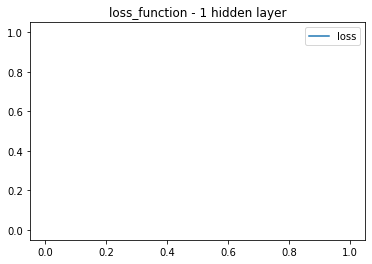

In [30]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [ ]:
# Define the model - deep neural net
number_input_features = 15
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [ ]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

# LSTM (Predicting Next Few Hours)

In [ ]:
# Set the random seed for reproducibility
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [ ]:
# Creating the Features X and Target y Data
def window_data(stocks_df_2, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(stocks_df_2) - window - 1):
        features = stocks_df_2.iloc[i : (i + window), feature_col_number]
        target = stocks_df_2.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
stocks_df_2

In [ ]:
# Creating the features (X) and target (y) data using the window_data() function.

window_size = 5

feature_column = 2
target_column = 2
X, y = window_data(stocks_df_2, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

In [ ]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Reshape Features for the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2 #dropping 20% of data

# Layer 1
model.add(LSTM(
    units=number_units, 
    return_sequences=True, 
    activation='tanh',
    input_shape=(X_train.shape[1], 1))  
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.summary()

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks.head()

In [ ]:
# Plot the real vs predicted prices as a line chart
stocks.plot(figsize=(20,10))